In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from mod_si import *
from find_net_stats import *
from matplotlib.patches import Patch

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


In [23]:
hort_data = "../params/yearly_clean_agg.csv"
G,id_idx = create_directed_network(hort_data)
#Create graph of all nodes
in_data,out_data = read_network_data(hort_data)

In [24]:
largest = max(nx.strongly_connected_components(G), key=len)
print(len(largest))

2037


In [4]:
def print_stats(in_data,out_data,tau):
    node_num = set(in_data.keys()).union(set(out_data.keys()))
    in_link_amount,out_link_amount = 0,0
    avg_deg = 0 
    avg_in_weight,avg_out_weight = 0,0
    in_link_amount = 0 
    out_link_amount = 0
    total_moves = 0 
    avg_strength = 0
    avg_in_strg_list = []
    num_in_link = 0
    avg_in_weight = 0
    for l in in_data:
        #node_deg += len(in_data[l])
       # move_per_link = 0
        for node in in_data[l]:
            in_link_amount += 1
            total_moves += in_data[l][node]
            avg_in_weight += in_data[l][node]
    avg_in_weight = (avg_in_weight/in_link_amount)*(1/tau)
    num_out_link = 0  
    for l in out_data:
        num_out_link += len(out_data[l])
        for node in out_data[l]:
            avg_out_weight += out_data[l][node]
            out_link_amount += 1
    avg_out_weight = (avg_out_weight / (out_link_amount))*(1/tau)
    avg_deg = num_in_link/(len(in_data)*1.0)
    return len(node_num),num_out_link,num_in_link,avg_deg,avg_in_weight,avg_out_weight,total_moves

In [5]:
def all_avg_w(dat_dict,tau):
    avg_str = 0
    all_w = []
    links = 0
    in_w = 0
    for node in dat_dict:
        node_deg  = len(dat_dict[node])
        move_per_link = 0
        for in_node in dat_dict[node]:
            in_w += dat_dict[node][in_node]
            links += 1
        #avg_w = (in_w/node_deg)/tau
        #all_w.append(avg_w)
    val = (in_w/links)/tau
    avg_w = [val]
    return avg_w
## weight variance 
def second_mom(dat_dict,tau):
    avg_str = 0
    all_w = []
    links = 0
    in_w = 0
    for node in dat_dict:
        node_deg  = len(dat_dict[node])
        move_per_link = 0
        for in_node in dat_dict[node]:
            in_w += (dat_dict[node][in_node] * dat_dict[node][in_node])
            links += 1
        #avg_w = (in_w/node_deg)/tau
        #all_w.append(avg_w)
    val = (in_w/links)/tau
    second_mom = [val]
    return second_mom

In [6]:
### now, we find yearly statistics
months = 1
tau = 365
avg_N = 0
avg_OL = 0
avg_K = 0
avg_IW = 0
avg_OW = 0
all_TW = 0
for m in range(1,2):
    fn = str(m)
    if m < 10:
        fn = "0"+str(m)
    fn = "../params/csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_K += K
    avg_IW += IW
    avg_OW += OW
    all_TW += TM
all_vals = []
for a in in_data:
    for k in in_data[a]:
        all_vals.append(in_data[a][k])
print(max(all_vals))
all_vals = []
for a in out_data:
    for k in out_data[a]:
        all_vals.append(out_data[a][k])
print(max(all_vals))
avg_N = avg_N/months
avg_OW = avg_OW/months
avg_OL = avg_OL/months
avg_K = avg_K/months
avg_IW = avg_IW/months
#var_N = np.var(all_N)
#var_OW = np.var(all_OW)
#var_K = np.var(all_K)
print("yearly average nodes: ",avg_N)
print("yearly average links: ",avg_OL)
print("yearly average incoming weights: ",avg_IW)
print("yearly average degree: ",avg_K)
print("yearly average outgoing weights: ",avg_OW)
print("yearly total movements: ",all_TW)

887.0
887.0
yearly average nodes:  2281.0
yearly average links:  23418.0
yearly average incoming weights:  0.010134342275055951
yearly average degree:  0.0
yearly average outgoing weights:  0.010134342275055951
yearly total movements:  86624.0


In [7]:
tau = 365
sec_mom = 0
all_sec_mom = []
for m in range(1,2):
    fn = "../params/horticulture365_check_NZ.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    all_w = all_avg_w(in_data,tau)
    s_w = second_mom(in_data,tau)
    all_sec_mom.append(s_w)
print("first moment: ",all_w[0])
print("second moment: ",all_sec_mom[0])

first moment:  0.010134342275055951
second moment:  [0.8436074814245452]


In [13]:
### now, we find monthly statistics
months = 12
tau = 30
avg_N = 0
avg_OL = 0
avg_K = 0
avg_IW = 0
avg_OW = 0
all_N,all_OL,all_K,all_IW,all_OW,all_TM = [],[],[],[],[],[]
for m in range(1,13):
    fn = str(m)
    if m < 10:
        fn = "0"+str(m)
    fn = "../params/new_month_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_K += K
    avg_IW += IW
    avg_OW += OW
    all_N.append(N)
    all_OL.append(OL)
    all_IW.append(IW)
    all_OW.append(OW)
    all_K.append(K)
    all_TM.append(TM)

avg_N = avg_N/months
avg_OW = avg_OW/months
avg_OL = avg_OL/months
avg_K = avg_K/months
avg_IW = avg_IW/months

var_N = np.var(all_N)
var_OW = np.var(all_OW)
var_K = np.var(all_K)
print("monthly average nodes: ",avg_N)
print("monthly average links: ",avg_OL)

monthly average nodes:  1152.75
monthly average links:  3413.25


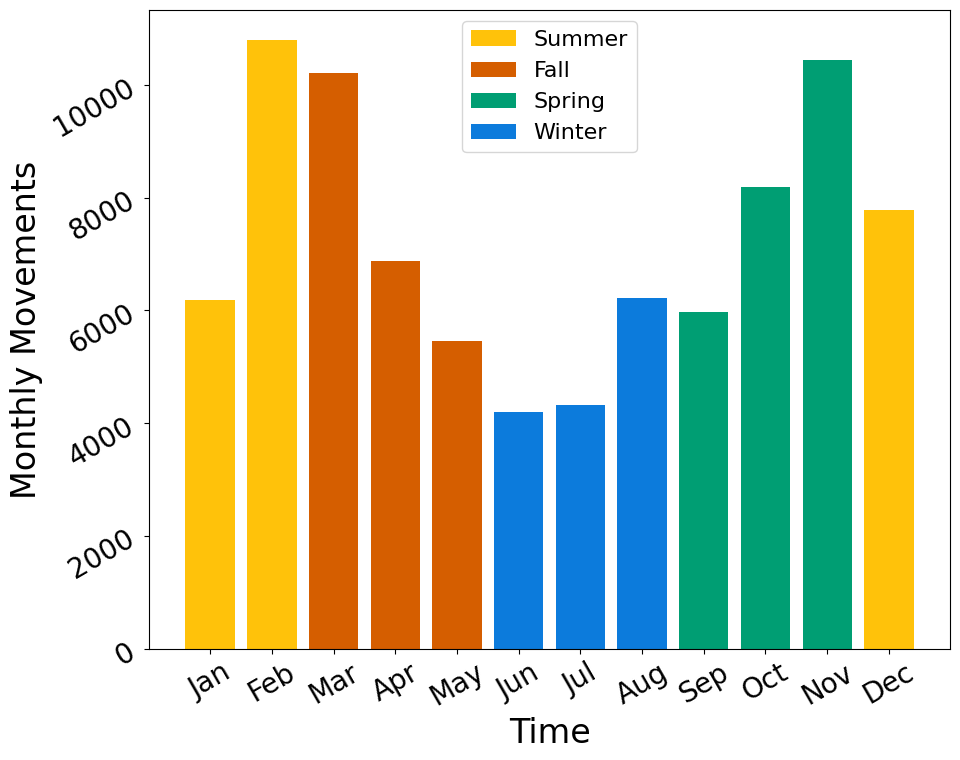

In [9]:
month_N = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
summer = "#FFC20A"
fall = "#D55E00"
winter = "#0C7BDC"
spring = "#009E73"
leg_fs = 16
x_fs,y_fs = 20,20
tick_angle = 30
sup_font = 24

handles = [
    Patch(facecolor=summer, label="Summer"),
    Patch(facecolor=fall, label="Fall"),
    Patch(facecolor=spring, label="Spring"),
    Patch(facecolor=winter, label="Winter")
]
colors  = [summer,summer,fall,fall,fall,winter,winter,winter,spring,spring,spring,summer]
fig_x,fig_y = 10,8
fig,axs = plt.subplots(1,1,figsize=(fig_x,fig_y))
fig = plt.bar(month_N,all_TM,color=colors)
plt.rcParams.update({'font.size': 20})
plt.ylabel("Monthly Movements",size=sup_font)
plt.xlabel("Time",fontsize=sup_font)
plt.legend(handles=handles,fontsize=leg_fs)
plt.xticks(rotation=tick_angle)
plt.tick_params(labelsize=x_fs,rotation=tick_angle)
plt.tight_layout()
#plt.ytick_params(labelsize=y_fs)
plt.savefig("figs/all_moves.png")

In [14]:
tau = 30
sec_mom = 0
all_sec_mom,all_mean = [],[]
for m in range(1,12):
    fn = str(m)
    if m < 10:
        fn = "0"+str(m)
    fn = "../params/new_month_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    all_w = all_avg_w(in_data,tau)
    s_w = second_mom(in_data,tau)
    all_mean.append(all_w[0])
    all_sec_mom.append(s_w[0])
print("first moment: ",np.mean(all_mean))
print("second moment: ",np.mean(all_sec_mom))

first moment:  0.0703601864076674
second moment:  0.8610543934932722


In [22]:
### now, we find seasonal statistics
months = 4
tau = 90
avg_N = 0
avg_K = 0
avg_OL = 0
seasons = ["SM","AT","WT","SP"]
all_OW,all_IW,all_N,all_K,all_K,all_OL,all_TM = [],[],[],[],[],[],[]
for s in seasons:
    fn = str(s)
    fn = "../params/new_season_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    N,OL,IL,K,IW,OW,TM = print_stats(in_data,out_data,tau)
    avg_N += N
    avg_OL += OL
    avg_IW += IW
    avg_K += K
    avg_OW += OW
    all_OW.append(OW)
    all_IW.append(IW)
    all_N.append(N)
    all_K.append(K)
    all_OL.append(OL)
    all_TM.append(TM)
avg_N = np.mean(all_N)
avg_OW = np.mean(all_OW)
avg_OL = np.mean(all_OL)
avg_K = np.mean(all_K)
avg_IW = np.mean(all_OW)
#avg_TM = all_TM/months
print(all_N)
print("seasonal average nodes: ",avg_N)
print("seasonal average links: ",avg_OL)
print("seasonal average incoming weights: ",avg_IW)
print("seasonal average outgoing weights: ",avg_OW)

[1889, 1767, 1309, 1541]
seasonal average nodes:  1626.5
seasonal average links:  8124.0
seasonal average incoming weights:  0.029924029100372795
seasonal average outgoing weights:  0.029924029100372795


In [15]:
tau = 90
sec_mom = 0
seasons = ["SM","AT","WT","SP"]

all_sec_mom,all_mean = [],[]
for m in range(0,4):
    fn = seasons[m]
    fn = "../params/new_season_tau/"+fn+"_2022.csv"
    G,id_idx = create_directed_network(fn)
    #Create graph of all nodes
    in_data,out_data = read_network_data(fn)
    all_w = all_avg_w(in_data,tau)
    s_w = second_mom(in_data,tau)
    all_mean.append(all_w[0])
    all_sec_mom.append(s_w[0])
print(all_mean)
print(all_sec_mom)
print("first moment: ",np.mean(all_mean))
print("second moment: ",np.mean(all_sec_mom))

[0.03123856394725219, 0.025556122738358573, 0.03142997207835113, 0.031471457637529274]
[0.6701179885166256, 0.8326663263569849, 0.9387897776925208, 0.741924833966755]
first moment:  0.02992402910037279
second moment:  0.7958747316332215
